### Random Forest Classifier is a popular supervised machine learning algorithm used for classification tasks. It belongs to the family of ensemble learning algorithms, which combine multiple models to improve their accuracy and robustness.

### The Random Forest Classifier creates a forest of decision trees, where each tree is built from a randomly selected subset of the features and a randomly sampled subset of the training data. During the training process, each tree independently predicts the class of a given input, and the final prediction is made by combining the predictions of all trees in the forest. The most common class predicted by the individual trees is considered as the final prediction.

![](https://www.freecodecamp.org/news/content/images/2020/08/how-random-forest-classifier-work.PNG)

In [1]:
%pip install opendatasets
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import opendatasets as od
import pandas
od.download(
	"https://www.kaggle.com/datasets/prathamtripathi/drug-classification")

Skipping, found downloaded files in "./drug-classification" (use force=True to force download)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 3. Loading dataset

In [4]:
drug_data = pd.read_csv('drug200.csv')
drug_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## 4. Data Preprocessing

In [5]:
drug_data.shape

(200, 6)

In [6]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
drug_data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
drug_data['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [9]:
drug_data['Sex'].unique()

array(['F', 'M'], dtype=object)

In [10]:
drug_data['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [11]:
drug_data['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [12]:
#rename the feature
drug_data.rename(columns = {'Sex':'Gender'}, inplace = True)

In [13]:
drug_data.head()

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [14]:
drug_data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [15]:
drug_data.columns

Index(['Age', 'Gender', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

### Label Encoding

In [16]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
drug_data['Gender'] = label_encoder.fit_transform(drug_data['Gender'])
drug_data['BP'] = label_encoder.fit_transform(drug_data['BP'])
drug_data['Drug'] = label_encoder.fit_transform(drug_data['Drug'])
drug_data['Cholesterol'] = label_encoder.fit_transform(drug_data['Cholesterol'])

In [17]:
drug_data.head(15)

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
5,22,0,2,0,8.607,4
6,49,0,2,0,16.275,0
7,41,1,1,0,11.037,3
8,60,1,2,0,15.171,0
9,43,1,1,1,19.368,0


In [18]:
drug_data['Drug'].unique()

array([0, 3, 4, 1, 2])

## 5. Feature Scalling

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(drug_data[['Age', 'Gender', 'Drug']],
                                                    drug_data.Age, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((140, 3), (60, 3))

In [20]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled_ro = scaler.fit_transform(X_train) 
X_test_scaled_ro = scaler.transform(X_test)

In [21]:
print('mean value of Age, Gender, Drug features: ', X_train_scaled_ro.mean(axis=0))
print('std value of Age, Gender, Drug features: ', X_test_scaled_ro.std(axis=0))

mean value of Age, Gender, Drug features:  [-0.06181319 -0.45        0.15      ]
std value of Age, Gender, Drug features:  [0.63505424 0.49749372 0.44556066]


(array([63.,  0.,  0.,  0.,  0.,  0.,  0., 77.]),
 array([-1.   , -0.875, -0.75 , -0.625, -0.5  , -0.375, -0.25 , -0.125,
         0.   ]),
 <BarContainer object of 8 artists>)

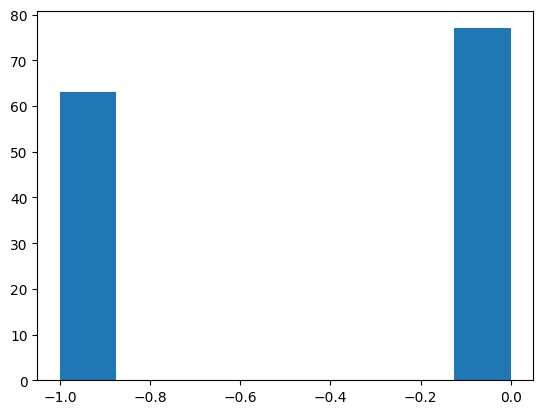

In [22]:
# the distribution of the transformed variable Age

plt.hist(X_train_scaled_ro[:,1], bins=8)

(array([61.,  0.,  0.,  0.,  0., 18.,  0.,  0.,  0.,  0., 13.,  0.,  0.,
         0.,  0., 12.,  0.,  0.,  0., 36.]),
 array([-0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,
         0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,
         0.65,  0.7 ,  0.75]),
 <BarContainer object of 20 artists>)

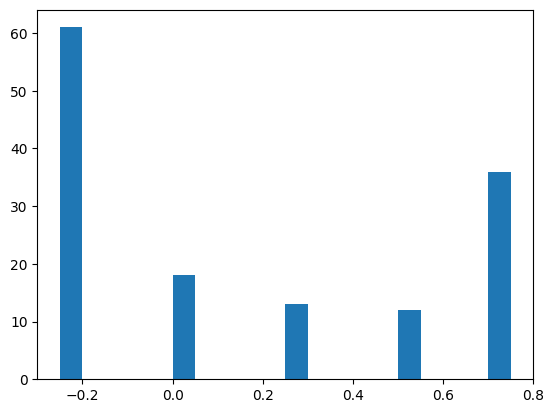

In [23]:
# the distribution of the transformed variable Fare

plt.hist(X_train_scaled_ro[:,2], bins=20)

## 6. EDA

Number of cells labeled Benign :  103
Number of cells labeled Malignant :  97

% of cells labeled Benign 51.5 %
% of cells labeled Malignant 48.5 %


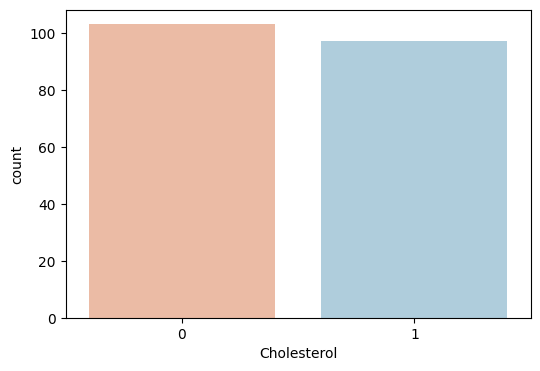

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(x = drug_data['Cholesterol'], palette = 'RdBu')

benign, malignant = drug_data['Cholesterol'].value_counts()
print('Number of cells labeled Benign : ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('% of cells labeled Benign', round(benign / len(drug_data) * 100, 2), '%')
print('% of cells labeled Malignant', round(malignant / len(drug_data) * 100, 2), '%')
plt.show()

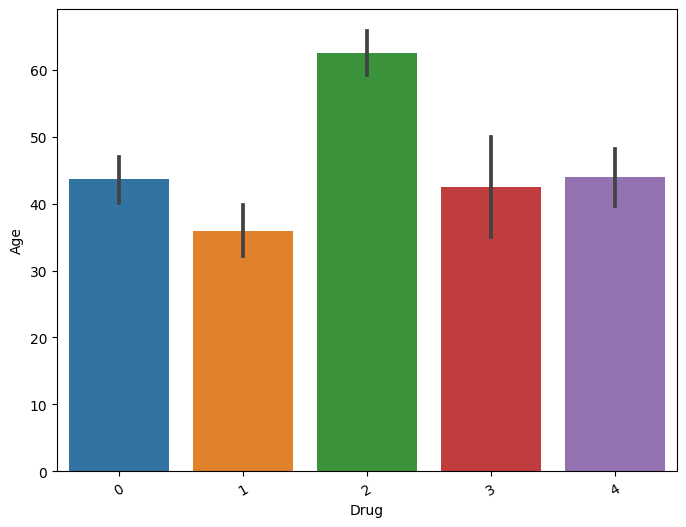

In [25]:
plt.figure(figsize=(8,6))
g = sns.barplot(data = drug_data, x = 'Drug', y = 'Age')
plt.xticks(rotation = 30)
plt.show()

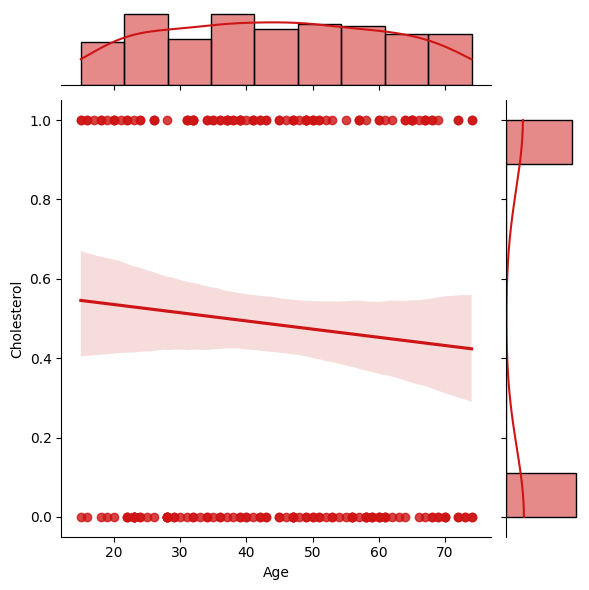

In [26]:
sns.jointplot(x = drug_data.loc[:,'Age'], y = drug_data.loc[:,'Cholesterol'], kind="reg", color="#ce1414")
plt.show()

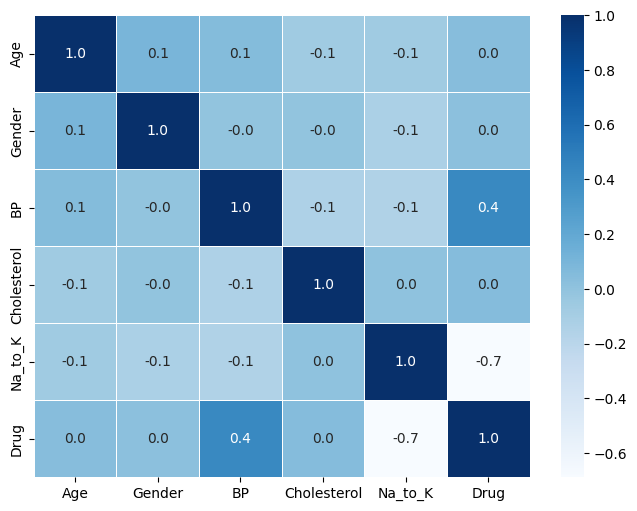

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(drug_data.corr(), annot = True, linewidths = .5, fmt = '.1f',ax = ax, cmap = 'Blues')
plt.show()

## 7. Data Splitting

In [28]:
drug_data.columns

Index(['Age', 'Gender', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [29]:
X = drug_data[['Age', 'Gender', 'BP', 'Cholesterol', 'Na_to_K']]
Y = drug_data['Drug'] 

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [31]:
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (140, 5)
x_test:  (60, 5)
y_train:  (140,)
y_test:  (60,)


## 8. Model Selection and Training

In [32]:
from sklearnex.ensemble import RandomForestClassifier
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [33]:
score = []
for i in range(1,51):
    clf = RandomForestClassifier(criterion = 'entropy', n_estimators = i)
    clf.fit(x_train,y_train)
    scores = clf.score(x_test,y_test)
    score.append(scores)

/home/u186172/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/u186172/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/u186172/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the 

In [34]:
score_rate = pd.DataFrame(data = score, columns = ['Score'])
score_rate.insert(loc=0, column = 'n_estimators', value=range(1,51))

In [36]:
model = RandomForestClassifier(criterion='entropy', n_estimators=30)
model.fit(x_train,y_train)

/home/u186172/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



RandomForestClassifier(criterion='entropy', n_estimators=30)

In [37]:
model.score(x_test,y_test)*100

96.66666666666667

In [38]:
predict = model.predict(x_test)
predict

array([0, 4, 0, 0, 3, 1, 4, 3, 1, 1, 0, 4, 3, 3, 0, 0, 0, 4, 0, 0, 0, 0,
       4, 0, 4, 0, 4, 4, 4, 0, 0, 0, 4, 0, 1, 0, 0, 4, 2, 0, 4, 0, 4, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 4, 0, 0])

## 9. Model Evaluation

In [39]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ', accuracy_score(y_test, predict))

Accuracy Score:  0.9666666666666667


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       0.80      1.00      0.89         4
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         4
           4       1.00      0.94      0.97        16

    accuracy                           0.97        60
   macro avg       0.95      0.94      0.94        60
weighted avg       0.97      0.97      0.97        60



## Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict)
cm

array([[32,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  1,  3,  0,  0],
       [ 0,  0,  0,  4,  0],
       [ 1,  0,  0,  0, 15]])

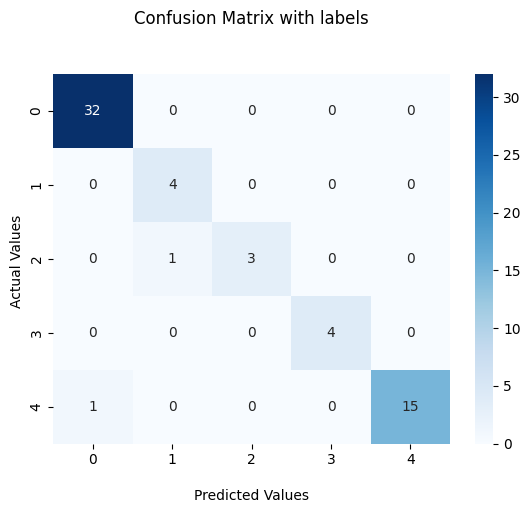

In [42]:
# visualize confusion metrix

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

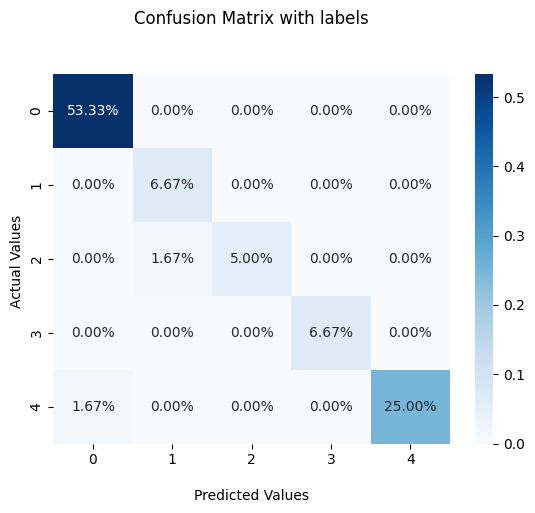

In [43]:
ax = sns.heatmap(cm/np.sum(cm), annot=True,  fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()